In [5]:
import numpy as np
import pandas as pd

In [6]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [7]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [32]:
data = pd.read_csv('/Users/sashwotkoirala/Desktop/MDS/Prep/ML/mlProjects/notebook/dataVII.csv')

In [33]:
data.head()

,Close,High,Low,Open,Volume
0,AAPL,AAPL,AAPL,AAPL,AAPL
1,6.4403300285339355,6.455075825369143,6.391277552762015,6.422875746236436,493729600
2,6.451465129852295,6.48787840981577,6.417458990809972,6.458085872315779,601904800
3,6.348847389221191,6.477046253588525,6.342226645342805,6.4514665085786,552160000
4,6.337109088897705,6.379842571822461,6.2910660382072985,6.372319000569361,477131200


In [34]:
data = data.drop(index=data.index[0]).reset_index(drop=True)

In [35]:
data.head()

,Close,High,Low,Open,Volume
0,6.4403300285339355,6.455075825369143,6.391277552762015,6.422875746236436,493729600
1,6.451465129852295,6.48787840981577,6.417458990809972,6.458085872315779,601904800
2,6.348847389221191,6.477046253588525,6.342226645342805,6.4514665085786,552160000
3,6.337109088897705,6.379842571822461,6.2910660382072985,6.372319000569361,477131200
4,6.379239559173584,6.379841846598225,6.291367069476212,6.328682371478371,447610800


In [37]:
data.round(2)

,Close,High,Low,Open,Volume
0,6.4403300285339355,6.455075825369143,6.391277552762015,6.422875746236436,493729600
1,6.451465129852295,6.48787840981577,6.417458990809972,6.458085872315779,601904800
2,6.348847389221191,6.477046253588525,6.342226645342805,6.4514665085786,552160000
3,6.337109088897705,6.379842571822461,6.2910660382072985,6.372319000569361,477131200
4,6.379239559173584,6.379841846598225,6.291367069476212,6.328682371478371,447610800
...,...,...,...,...,...
3826,214.10000610351562,217.49000549316406,212.22000122070312,213.99000549316406,48862900
3827,218.27000427246094,218.83999633789062,211.27999877929688,211.55999755859375,94127800
3828,220.72999572753906,221.47999572753906,218.5800018310547,221.0,44299500
3829,223.75,224.10000610351562,220.0800018310547,220.77000427246094,34493600


In [39]:
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data[['Close']])

In [40]:
train_size = int(len(data) * 0.8)
train_data, test_data = data_scaled[:train_size], data_scaled[train_size:]

In [41]:
def create_sequences(data, seq_length=50):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [42]:
seq_length = 50
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [43]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [44]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [45]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [46]:
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0094 - val_loss: 0.0030
Epoch 2/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 6.2421e-04 - val_loss: 6.9898e-04
Epoch 3/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 5.2023e-04 - val_loss: 0.0014
Epoch 4/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.9051e-04 - val_loss: 8.2601e-04
Epoch 5/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 3.9093e-04 - val_loss: 0.0093
Epoch 6/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 3.8522e-04 - val_loss: 6.2219e-04
Epoch 7/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 2.7914e-04 - val_loss: 0.0010
Epoch 8/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 3.1029e-04 - val_loss: 0.0013
Epoch 9/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 3.4374e-04 - val_loss: 0.0024
Epoch 10/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 2.8424e-04 - val_loss: 0.0016
Epoch 11/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 3.2807e-04 - val_loss: 0.0010
Epoch 12/30

In [47]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


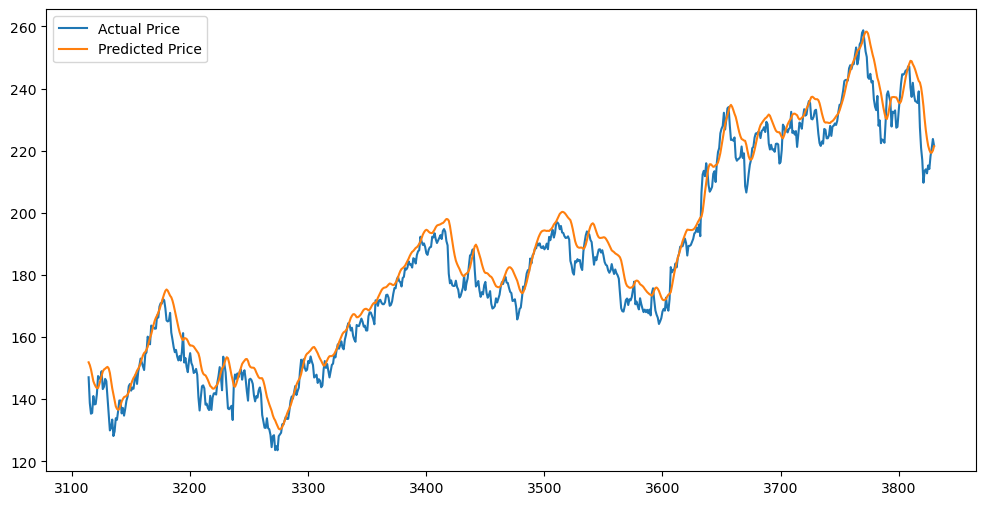

In [48]:
plt.figure(figsize=(12,6))
plt.plot(data.index[train_size+seq_length:], scaler.inverse_transform(test_data[seq_length:]), label='Actual Price')
plt.plot(data.index[train_size+seq_length:], predictions, label='Predicted Price')
plt.legend()
plt.show()